In [ ]:
# run with GPU T4
import os

# there is problem with the cuda so we need to use this to run the gpu inside the google colab
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda/lib64'
os.environ["BITSANDBYTES_CUDA_VERSION"] = "124"  # Adjust if necessary

%cd /content/
!wget https://github.com/bitsandbytes-foundation/bitsandbytes/archive/refs/tags/0.41.0.zip
!unzip "/content/0.41.0.zip"

%cd bitsandbytes-0.41.0
!CUDA_VERSION=124 python setup.py install
%cd ..

/content
--2025-02-03 23:27:11--  https://github.com/bitsandbytes-foundation/bitsandbytes/archive/refs/tags/0.41.0.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/bitsandbytes-foundation/bitsandbytes/zip/refs/tags/0.41.0 [following]
--2025-02-03 23:27:12--  https://codeload.github.com/bitsandbytes-foundation/bitsandbytes/zip/refs/tags/0.41.0
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘0.41.0.zip’

0.41.0.zip              [ <=>                ] 222.42K  --.-KB/s    in 0.03s   

2025-02-03 23:27:12 (7.57 MB/s) - ‘0.41.0.zip’ saved [227762]

Archive:  /content/0.41.0.zip
a06a0f6a08cb23754b110359a109e069fa97ce9e
   creating

In [ ]:
from google.colab import drive
from google.colab import userdata

drive.mount('/content/drive')

Mounted at /content/drive


#Setting the evaluation's images

In [ ]:
# # If the files/folders already exist in your Drive, run this script to bind them to other location as references
# # instead of re-downloading and unzipping them each time the notebook runs.
"""
%%bash
for item in "/content/drive/MyDrive/Colab Notebooks/Grounded Language Processing [146078]/Projects/DATA/single_image_dailylife/"*; do
    ln -s "$item" /content/
done
"""

In [ ]:
%cd "/content/"

/content


In [ ]:
# Put your path
!unzip "/content/drive/MyDrive/Anotações/Codes Google Colab/single_image_dailylife.zip"

Streaming output truncated to the last 5000 lines.
  inflating: single_image/rw_7931679102/12.png  
  inflating: single_image/rw_7931679102/4.png  
  inflating: single_image/rw_7931679102/7.png  
  inflating: single_image/rw_7931679102/10.png  
  inflating: single_image/rw_7931679102/13.png  
  inflating: single_image/rw_7931679102/5.png  
  inflating: single_image/rw_7931679102/17.png  
  inflating: single_image/rw_7931679102/14.png  
  inflating: single_image/rw_7931679102/9.png  
   creating: single_image/rw_5271223888/
  inflating: single_image/rw_5271223888/2.png  
  inflating: single_image/rw_5271223888/6.png  
  inflating: single_image/rw_5271223888/8.png  
  inflating: single_image/rw_5271223888/3.png  
  inflating: single_image/rw_5271223888/1.png  
  inflating: single_image/rw_5271223888/4.png  
  inflating: single_image/rw_5271223888/7.png  
  inflating: single_image/rw_5271223888/10.png  
  inflating: single_image/rw_5271223888/5.png  
  inflating: single_image/rw_527122388

In [ ]:
import os
import shutil

## there are some folders/files of ipynb checkpoints which will disturb our workflow, so we will remove it first

# Define the root directory (update this if needed)
ROOT_DIR = "/content/single_image"

# Walk through all files and folders
for root, dirs, files in os.walk(ROOT_DIR, topdown=False):
    # Remove matching files
    for file in files:
        if "checkpoint" in file.lower():
            file_path = os.path.join(root, file)
            print(f"Deleting file: {file_path}")
            os.remove(file_path)

    # Remove matching directories
    for dir in dirs:
        if "checkpoint" in dir.lower():
            dir_path = os.path.join(root, dir)
            print(f"Deleting folder: {dir_path}")
            shutil.rmtree(dir_path)

Deleting file: /content/single_image/rw_2715505162/.ipynb_checkpoints/1-checkpoint.png
Deleting folder: /content/single_image/rw_2715505162/.ipynb_checkpoints
Deleting file: /content/single_image/rw_8364779007/.ipynb_checkpoints/5-checkpoint.png
Deleting file: /content/single_image/rw_8364779007/.ipynb_checkpoints/4-checkpoint.png
Deleting file: /content/single_image/rw_8364779007/.ipynb_checkpoints/6-checkpoint.png
Deleting file: /content/single_image/rw_8364779007/.ipynb_checkpoints/8-checkpoint.png
Deleting file: /content/single_image/rw_8364779007/.ipynb_checkpoints/14-checkpoint.png
Deleting file: /content/single_image/rw_8364779007/.ipynb_checkpoints/15-checkpoint.png
Deleting file: /content/single_image/rw_8364779007/.ipynb_checkpoints/9-checkpoint.png
Deleting file: /content/single_image/rw_8364779007/.ipynb_checkpoints/3-checkpoint.png
Deleting file: /content/single_image/rw_8364779007/.ipynb_checkpoints/1-checkpoint.png
Deleting file: /content/single_image/rw_8364779007/.ipyn

##Organizing the dataset

In [ ]:
import shutil
import random
import os

def move_images(source_folder, destination_folder, limit=None):
    """
    Move a specified number of images from the source folder to the destination folder.

    :param source_folder: Path to the source folder.
    :param destination_folder: Path to the destination folder.
    :param limit: Number of items to move (default is None, meaning move all items).
    """

    if not os.path.exists(source_folder):
        print(f"Source folder '{source_folder}' does not exist.")
        return
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)  # Create the destination folder if it doesn't exist

        # Get all items in the source folder sorted
        items = sorted(os.listdir(source_folder))

        # If a limit is specified, slice the list of items
        if limit is not None:
            items = items[:limit]

        # Move each item
        for item in items:
            source_path = os.path.join(source_folder, item)
            destination_path = os.path.join(destination_folder, item)

            shutil.copytree(source_path, destination_path)
    else:
        return

In [ ]:
SOURCE = '/content/single_image'

# Creating folder for the images dataset
PATH_IMAGES_DATASET = '/content/images_dataset/'
os.makedirs(PATH_IMAGES_DATASET, exist_ok=True)

# Moving the images
move_images(SOURCE, PATH_IMAGES_DATASET + 'full_dataset', limit=6)
move_images(SOURCE, PATH_IMAGES_DATASET + 'incorrect_prompt', limit=3)
move_images(SOURCE, PATH_IMAGES_DATASET + 'incorrect_images', limit=3)
move_images(SOURCE, PATH_IMAGES_DATASET + 'shuffled', limit=3)
move_images(SOURCE, PATH_IMAGES_DATASET + 'reduced_example', limit=3)


# Creating folder for the images descriptions
PATH_IMAGES_DESCRIPTION = '/content/images_description/'
os.makedirs(PATH_IMAGES_DATASET, exist_ok=True)

os.makedirs(PATH_IMAGES_DESCRIPTION, exist_ok=True)
os.makedirs(PATH_IMAGES_DESCRIPTION + 'full_dataset', exist_ok=True)
os.makedirs(PATH_IMAGES_DESCRIPTION + 'incorrect_prompt', exist_ok=True)
os.makedirs(PATH_IMAGES_DESCRIPTION + 'incorrect_images', exist_ok=True)
os.makedirs(PATH_IMAGES_DESCRIPTION + 'shuffled', exist_ok=True)
os.makedirs(PATH_IMAGES_DESCRIPTION + 'reduced_example', exist_ok=True)

In [ ]:
items = os.listdir('/content/images_dataset/full_dataset')
print(len(items), items)

items = os.listdir('/content/single_image')
print(len(items), items)

items = os.listdir('/content/images_dataset/shuffled')
print(len(items), items)

items = os.listdir('/content/images_dataset/incorrect_images')
print(len(items), items)

6 ['rw_10521491465', 'rw_10111267264', 'rw_10192494165', 'rw_10186675055', 'rw_10289713176', 'rw_10011555465']
450 ['rw_12620917425', 'rw_3420447174', 'rw_4452848541', 'rw_3863283218', 'rw_11261138255', 'rw_5153854160', 'rw_5967694182', 'rw_5942411333', 'rw_7004267908', 'rw_4638616409', 'rw_3265024425', 'rw_4006742735', 'rw_4650584618', 'rw_7370954858', 'rw_3443791836', 'rw_13884124143', 'rw_2765617638', 'rw_2972558344', 'rw_7121723227', 'rw_5241603640', 'rw_2594144360', 'rw_4599618003', 'rw_3552516882', 'rw_7506103208', 'rw_6236608754', 'rw_2467532859', 'rw_3023021780', 'rw_9578365556', 'rw_6513201899', 'rw_5358657883', 'rw_3148635011', 'rw_4458207675', 'rw_3918022916', 'rw_6972903978', 'rw_3091550860', 'rw_5502438239', 'rw_7368921690', 'rw_7512011714', 'rw_5356516473', 'rw_5379354799', 'rw_2610839960', 'rw_11396390844', 'rw_2617504308', 'rw_11688108404', 'rw_6217597005', 'rw_2513801289', 'rw_8595715210', 'rw_3396663702', 'rw_4354621230', 'rw_9583453634', 'rw_5782595661', 'rw_82917003

###Incorrect images

The objective is to intentionally insert incorrect images into each example to induce hallucinations. To achieve this, we will select an image from the last 30 examples of the dataset and insert it randomly into each instance. The number of images added will be proportional to the example's size, with a chosen rate of 20%.

30 ['/content/single_image/rw_8716087070/1.png', '/content/single_image/rw_8748339924/1.png', '/content/single_image/rw_8749201145/1.png', '/content/single_image/rw_8787162041/1.png', '/content/single_image/rw_8886126628/1.png', '/content/single_image/rw_8903248754/1.png', '/content/single_image/rw_8929324728/1.png', '/content/single_image/rw_8968804598/1.png', '/content/single_image/rw_8997865396/1.png', '/content/single_image/rw_9069281283/1.png', '/content/single_image/rw_9170516863/1.png', '/content/single_image/rw_9177467036/1.png', '/content/single_image/rw_9186559718/1.png', '/content/single_image/rw_9301723427/1.png', '/content/single_image/rw_9337790459/1.png', '/content/single_image/rw_9338319433/1.png', '/content/single_image/rw_9393719235/1.png', '/content/single_image/rw_9472331203/1.png', '/content/single_image/rw_9494885165/1.png', '/content/single_image/rw_9520717551/1.png', '/content/single_image/rw_9566614158/1.png', '/content/single_image/rw_9578365556/1.png', '/cont

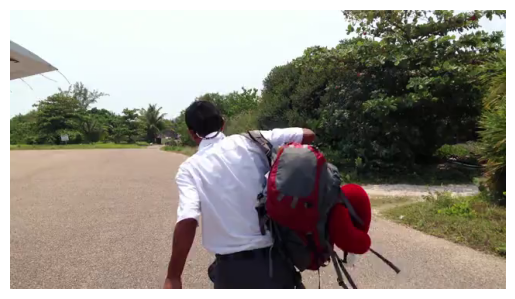

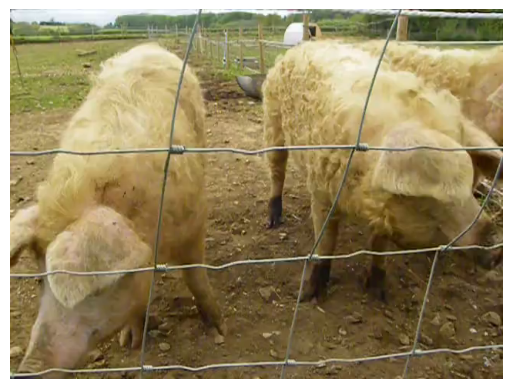

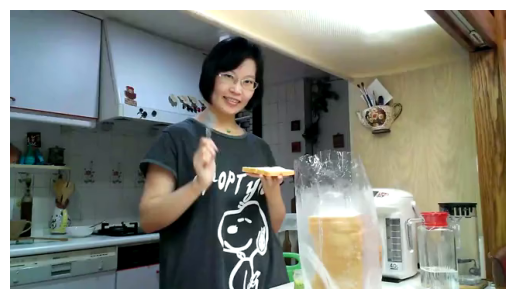

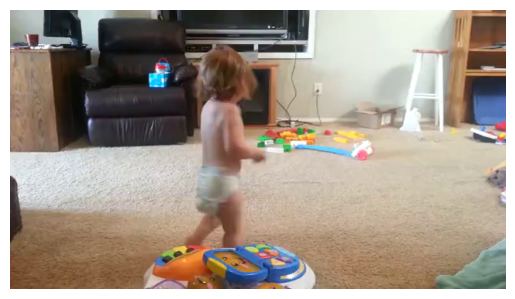

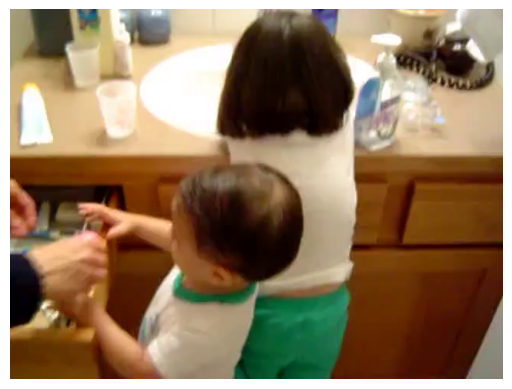

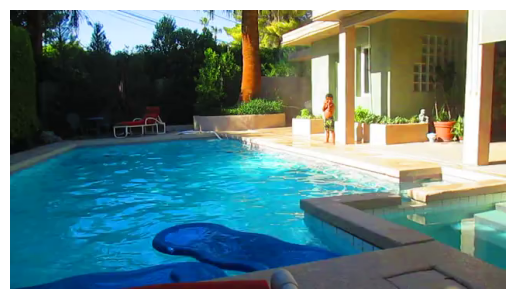

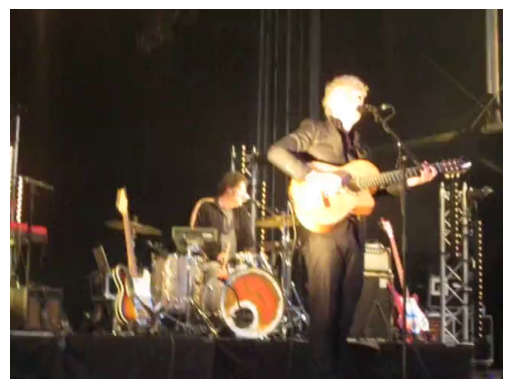

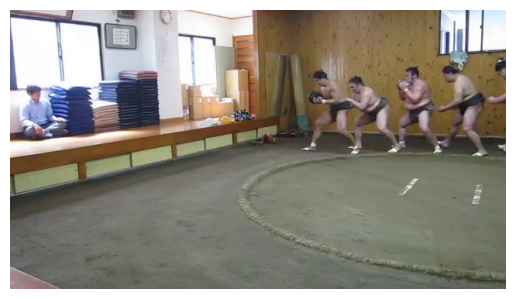

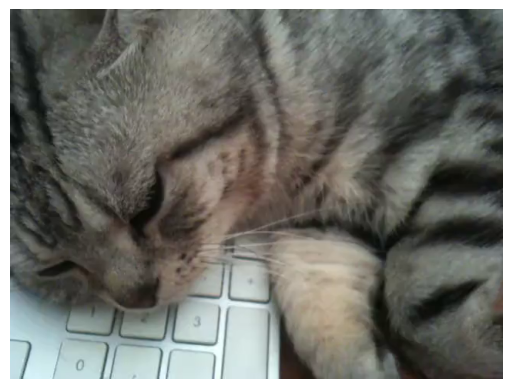

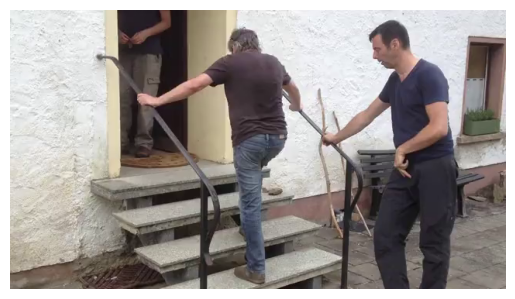

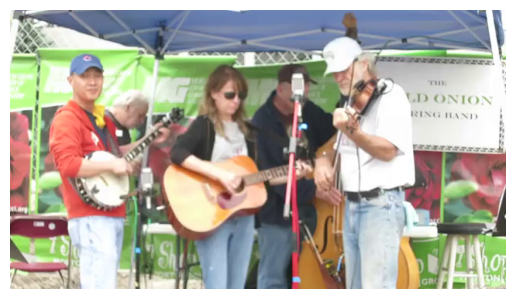

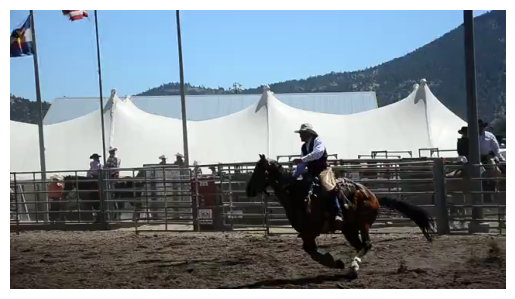

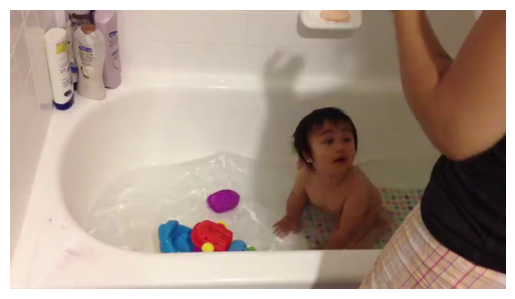

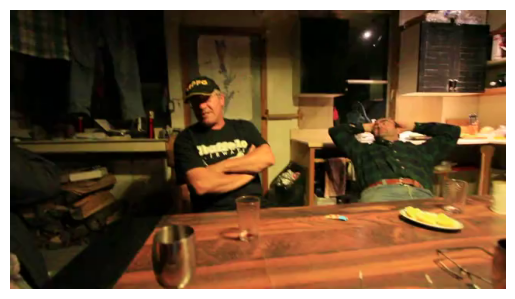

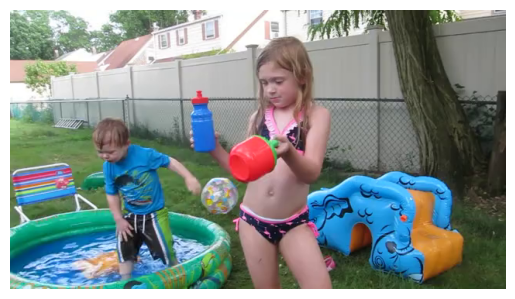

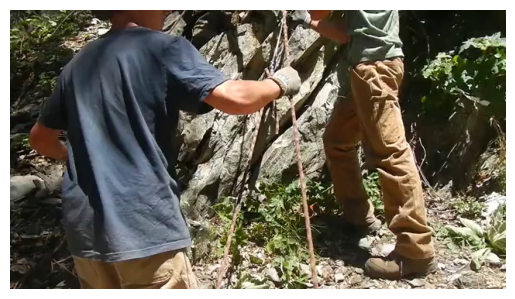

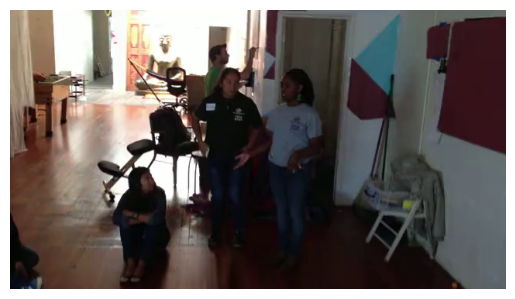

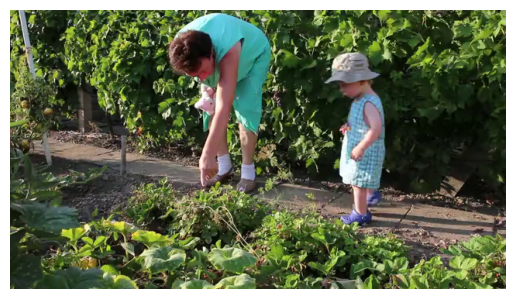

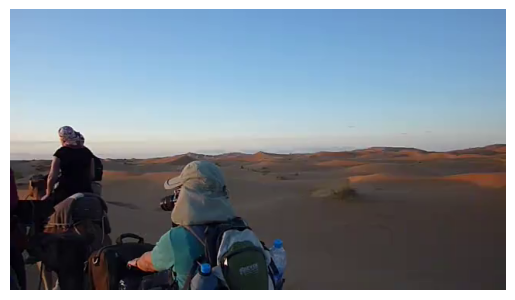

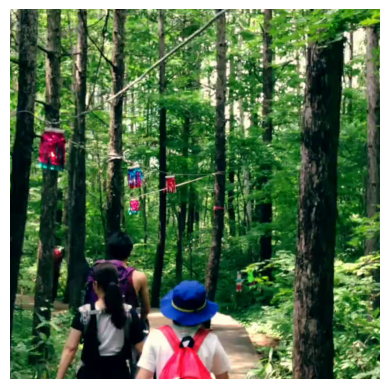

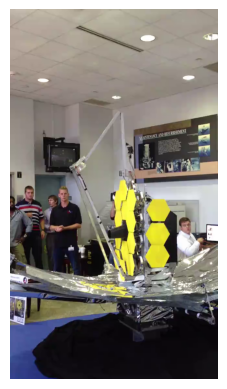

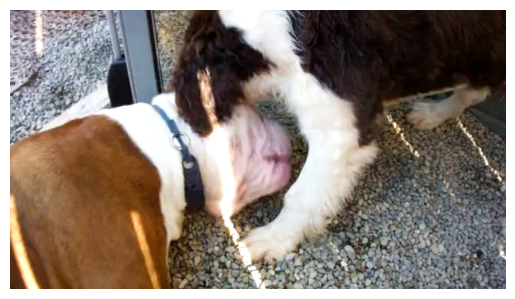

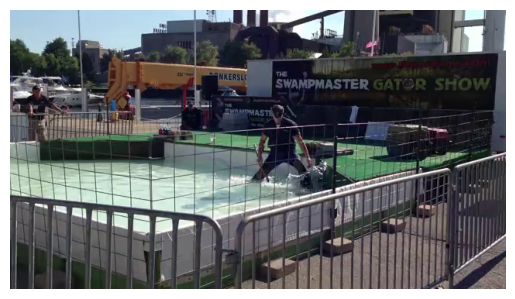

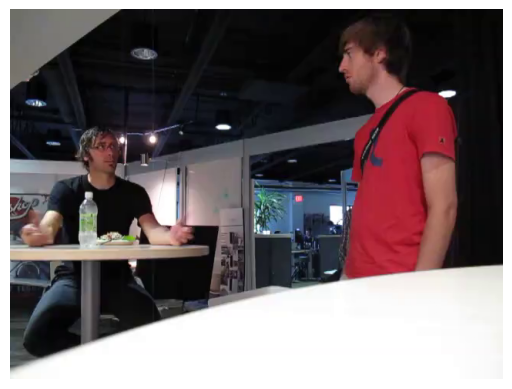

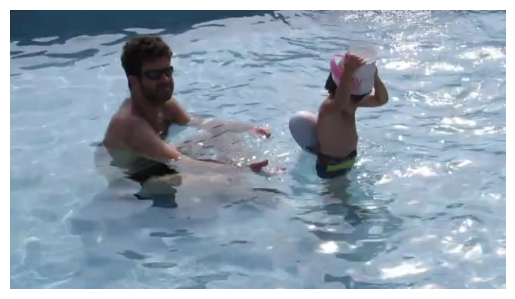

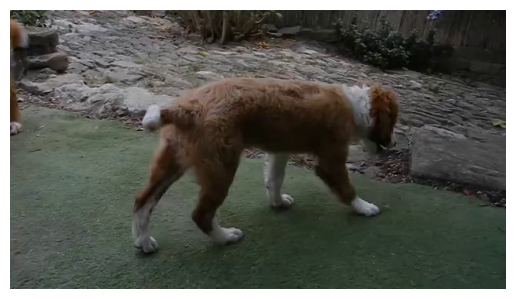

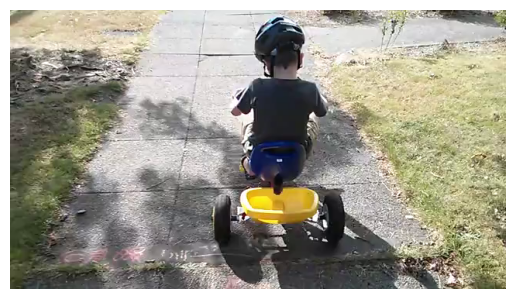

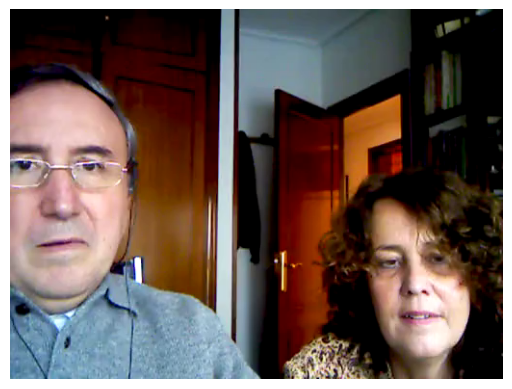

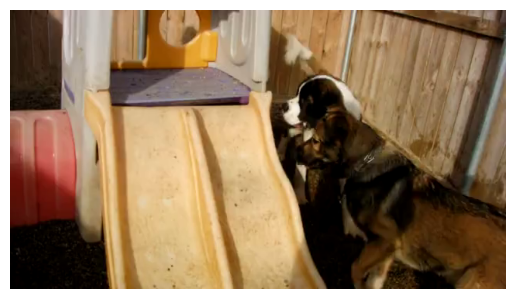

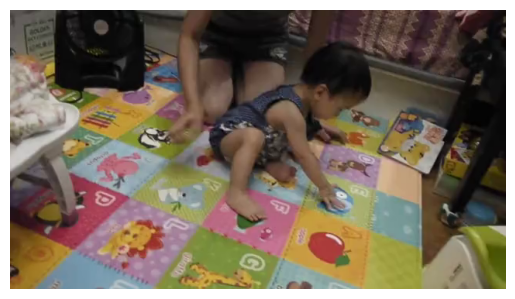

In [ ]:
# Selecting the last 30 examples
items = sorted(os.listdir(SOURCE))[-30:]

# Getting the first image of every example
incorrect_images = [os.path.join(SOURCE, item) + "/1.png" for item in items]
print(len(incorrect_images), incorrect_images)

# Vizualize the image of every example
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for image in incorrect_images:
    img = mpimg.imread(image)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


Insert the incorrect images in the examples with seed 42 to make the experiment replicable

In [ ]:
# Set seed for reproducibility
random.seed(42)

# Setting the rate and the path
rate = 0.2
INCORRECT_IMAGES_PATH = PATH_IMAGES_DATASET + "incorrect_images"

# Selecting the incorrect images

for example in os.listdir(INCORRECT_IMAGES_PATH):
    example_images = os.listdir(os.path.join(INCORRECT_IMAGES_PATH, example))
    example_images_size = len(example_images)

    num_incorrect_images = round(example_images_size * rate)
    selected_incorrect_images = random.sample(incorrect_images, num_incorrect_images)

    for image in selected_incorrect_images:

        # Placing the incorrect images in random postions
        position = random.randint(1, example_images_size)
        destination_path = os.path.join(INCORRECT_IMAGES_PATH, example, f"{position}A.png")

        # Checking if there is already an incorrect example in that position
        while os.path.exists(destination_path):
            position = random.randint(1, example_images_size)
            destination_path = os.path.join(INCORRECT_IMAGES_PATH, example, f"{position}A.png")

        shutil.copy(image, destination_path)

###Reduced example

Here the objective is to reduce the size of the example by removing some of the images. As was done in the incorrect images, the number of images removed will be proportional to the example's size, with a chosen rate of 20%

In [ ]:
# Set seed for reproducibility
random.seed(42)

# Setting the rate and the path
rate = 0.2
REDUCED_EXAMPLE_PATH = PATH_IMAGES_DATASET + "reduced_example"


for example in os.listdir(REDUCED_EXAMPLE_PATH):
    example_images = os.listdir(os.path.join(REDUCED_EXAMPLE_PATH, example))
    example_images_size = len(example_images)

    num_images_to_remove = round(example_images_size * rate)
    images_to_remove = random.sample(example_images, num_images_to_remove)

    for image in images_to_remove:
        os.remove(os.path.join(REDUCED_EXAMPLE_PATH, example, image))

###Shuffled

Here the idea is simply shuffle the order of the images

In [ ]:
# Set seed for reproducibility
random.seed(42)

# Setting the path
SHUFFLED_PATH = PATH_IMAGES_DATASET + "shuffled"

# Shuffling the images
for example in os.listdir(SHUFFLED_PATH):
    new_positions = list(range(1, len(os.listdir(os.path.join(SHUFFLED_PATH, example))) + 1))
    random.shuffle(new_positions)

    # Adding "A" in the images's name so we don't have files with the same name when changing its position
    example_images = os.listdir(os.path.join(SHUFFLED_PATH, example))

    for image in example_images:
        temporary_name = "A" + image
        os.rename(os.path.join(SHUFFLED_PATH, example, image),
                  os.path.join(SHUFFLED_PATH, example, temporary_name))

    # Changing the position
    modified_example_images = os.listdir(os.path.join(SHUFFLED_PATH, example))

    for image in modified_example_images:

        os.rename(os.path.join(SHUFFLED_PATH, example, image),
                  os.path.join(SHUFFLED_PATH, example, f"{new_positions.pop(0)}.png"))

#Chat-UniVi for image sequence

In [ ]:
%cd "/content/"
!git clone https://github.com/PKU-YuanGroup/Chat-UniVi

/content
Cloning into 'Chat-UniVi'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 449 (delta 167), reused 120 (delta 120), pack-reused 256 (from 1)
Receiving objects: 100% (449/449), 39.09 MiB | 32.12 MiB/s, done.
Resolving deltas: 100% (215/215), done.


In [ ]:
%cd Chat-UniVi
!pip install -q virtualenv
!virtualenv /content/chatunivi_env --python=python3.10
!source /content/chatunivi_env/bin/activate

/content/Chat-UniVi
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/bitsandbytes-0.41.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 36.9 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 584ms
  creator CPython3Posix(dest=/content/chatunivi_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.3.1, setuptools==75.8.0, wheel==0.45.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


*Keep in mind that deepspeed is intended for training models only. If you are solely engaged in inference and not training models, it is recommended to comment it out.*

In [ ]:
# Removing deepspeed==0.9.5

with open("/content/Chat-UniVi/pyproject.toml", "r") as f:
    lines = f.readlines()
    del lines[19]

with open("/content/Chat-UniVi/pyproject.toml", "w") as f:
    f.writelines(lines)

with open("/content/Chat-UniVi/pyproject.toml", "r") as f:
    print(f.read())


[build-system]
requires = ["setuptools>=61.0"]
build-backend = "setuptools.build_meta"

[project]
name = "ChatUniVi"
version = "1.0.1"
description = "Towards GPT-4 like large language and visual assistant."
readme = "README.md"
requires-python = ">=3.8"
classifiers = [
    "Programming Language :: Python :: 3",
    "License :: OSI Approved :: Apache Software License",
]
dependencies = [
    "einops", "fastapi", "gradio==3.35.2", "markdown2[all]", "numpy",
    "requests", "sentencepiece", "tokenizers>=0.12.1",
    "torch", "torchvision", "uvicorn", "wandb",
    "shortuuid", "httpx==0.24.0",
    "peft==0.4.0",
    "transformers==4.31.0",
    "accelerate==0.21.0",
    "bitsandbytes==0.41.0",
    "scikit-learn==1.2.2",
    "sentencepiece==0.1.99",
    "einops==0.6.1", "einops-exts==0.0.4", "timm==0.6.13",
    "gradio_client==0.2.9",
    "gradio==3.35.2",
    "imageio==2.31.3",
    "imageio-ffmpeg==0.4.9",
    "openai",
    "timm",
    "decord==0.6.0",
    "jsonlines"
]

[tool.setuptools.pa

In [ ]:
!pip install --upgrade pip
!pip install -e .
# pip install ninja  # If you only intend to perform inference, there's no need to install ```ninja```.
# pip install flash-attn --no-build-isolation  # If you only intend to perform inference, there's no need to install ```flash-attn```.

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/bitsandbytes-0.41.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached pip-25.0-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/bitsandbytes-0.41.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Obtaining file:///content/Chat-UniVi
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build

In [ ]:
# Image sequence inference

import torch
import os
from ChatUniVi.constants import *
from ChatUniVi.conversation import conv_templates, SeparatorStyle
from ChatUniVi.model.builder import load_pretrained_model
from ChatUniVi.utils import disable_torch_init
from ChatUniVi.mm_utils import tokenizer_image_token, get_model_name_from_path, KeywordsStoppingCriteria
from PIL import Image
from decord import VideoReader, cpu
import numpy as np

In [ ]:
def _get_images_from_folder(folder_path, image_processor, max_frames=MAX_IMAGE_LENGTH, image_resolution=224):
    """
    Load a sequence of images from a folder, preprocess them, and return as a tensor.
    """
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"Folder {folder_path} not found.")

    # Get all image paths
    image_paths = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

    # Limit to max_frames
    if len(image_paths) > max_frames:
        image_paths = [image_paths[i] for i in np.linspace(0, len(image_paths) - 1, num=max_frames, dtype=int)]

    # Preprocess images
    processed_images = []
    for img_path in image_paths:
        img = Image.open(img_path).convert("RGB")
        processed_image = image_processor.preprocess(img, return_tensors='pt')['pixel_values'][0]
        processed_images.append(processed_image)

    # Stack into a tensor
    if processed_images:
        images_tensor = torch.stack(processed_images)
        slice_len = images_tensor.shape[0]
        return images_tensor, slice_len
    else:
        raise ValueError("No images found in the folder.")


##Downloading the model

*Run only once*

In [ ]:
# Model Parameter
model_path = "Chat-UniVi/Chat-UniVi"  # or "Chat-UniVi/Chat-UniVi-13B"、"Chat-UniVi/Chat-UniVi-v1.5"

# The number of visual tokens varies with the length of the video. "max_frames" is the maximum number of frames.
# When the video is long, we will uniformly downsample the video to meet the frames when equal to the "max_frames".
max_frames = 100

# The number of frames retained per second in the video.
video_framerate = 1

# Sampling Parameter
conv_mode = "simple"
temperature = 0.2
top_p = None
num_beams = 1

disable_torch_init()
model_path = os.path.expanduser(model_path)
model_name = "ChatUniVi"
tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name)

mm_use_im_start_end = getattr(model.config, "mm_use_im_start_end", False)
mm_use_im_patch_token = getattr(model.config, "mm_use_im_patch_token", True)
if mm_use_im_patch_token:
    tokenizer.add_tokens([DEFAULT_IMAGE_PATCH_TOKEN], special_tokens=True)
if mm_use_im_start_end:
    tokenizer.add_tokens([DEFAULT_IM_START_TOKEN, DEFAULT_IM_END_TOKEN], special_tokens=True)
model.resize_token_embeddings(len(tokenizer))

vision_tower = model.get_vision_tower()
if not vision_tower.is_loaded:
    vision_tower.load_model()
image_processor = vision_tower.image_processor

if model.config.config["use_cluster"]:
    for n, m in model.named_modules():
        m = m.to(dtype=torch.bfloat16)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/75.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.12G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

generation_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

##Creating the images descriptions

In [ ]:
def generate_images_description(images_folder_path, images_description_path, prompt):

    # Input Text
    qs = prompt
    # Check if the video exists
    if images_folder_path is not None:
        video_frames, slice_len = _get_images_from_folder(images_folder_path, image_processor, max_frames=max_frames)
        model.past_key_values = None

        cur_prompt = qs
        if model.config.mm_use_im_start_end:
            qs = DEFAULT_IM_START_TOKEN + DEFAULT_IMAGE_TOKEN * slice_len + DEFAULT_IM_END_TOKEN + '\n' + qs
        else:
            qs = DEFAULT_IMAGE_TOKEN * slice_len + '\n' + qs

        conv = conv_templates[conv_mode].copy()
        conv.append_message(conv.roles[0], qs)
        conv.append_message(conv.roles[1], None)
        prompt = conv.get_prompt()

        input_ids = tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(
            0).cuda()

        stop_str = conv.sep if conv.sep_style != SeparatorStyle.TWO else conv.sep2
        keywords = [stop_str]
        stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)

        with torch.inference_mode():
            output_ids = model.generate(
                input_ids,
                images=video_frames.half().cuda(),
                do_sample=True,
                temperature=temperature,
                top_p=top_p,
                num_beams=num_beams,
                output_scores=True,
                return_dict_in_generate=True,
                max_new_tokens=1024,
                use_cache=True,
                stopping_criteria=[stopping_criteria])

        output_ids = output_ids.sequences
        input_token_len = input_ids.shape[1]
        n_diff_input_output = (input_ids != output_ids[:, :input_token_len]).sum().item()
        if n_diff_input_output > 0:
            print(f'[Warning] {n_diff_input_output} output_ids are not the same as the input_ids')
        outputs = tokenizer.batch_decode(output_ids[:, input_token_len:], skip_special_tokens=True)[0]
        outputs = outputs.strip()
        if outputs.endswith(stop_str):
            outputs = outputs[:-len(stop_str)]
        outputs = outputs.strip()

        # Create a txt file with the image description
        with open(f'{images_description_path}.txt', 'w') as f:
            f.write(outputs)

###Full dataset

In [ ]:
prompt = "Write a description for the given image sequence in a single paragraph, what is happening in this episode?"
FULL_DATASET_PATH = PATH_IMAGES_DATASET + 'full_dataset'
FULL_DATASET_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'full_dataset'

examples = sorted(os.listdir(FULL_DATASET_PATH))

for example in examples:
    example_path = os.path.join(FULL_DATASET_PATH, example)
    example_description_path = os.path.join(FULL_DATASET_DESCRIPTION_PATH, example)

    generate_images_description(example_path, example_description_path, prompt)
    print("Description generated for", example)

Description generated for rw_10011555465
Description generated for rw_10111267264
Description generated for rw_10186675055
Description generated for rw_10192494165
Description generated for rw_10289713176
Description generated for rw_10521491465


###Incorrect images

In [ ]:
prompt = "Write a description for the given image sequence in a single paragraph, what is happening in this episode?"
INCORRECT_IMAGES_PATH = PATH_IMAGES_DATASET + 'incorrect_images'
INCORRECT_IMAGES_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'incorrect_images'

examples = sorted(os.listdir(INCORRECT_IMAGES_PATH))

for example in examples:
    example_path = os.path.join(INCORRECT_IMAGES_PATH, example)
    example_description_path = os.path.join(INCORRECT_IMAGES_DESCRIPTION_PATH, example)

    generate_images_description(example_path, example_description_path, prompt)
    print("Description generated for", example)

Description generated for rw_10011555465
Description generated for rw_10111267264
Description generated for rw_10186675055


###Incorrect prompt

In [ ]:
import pandas as pd

INCORRECT_PROMPT_PATH = PATH_IMAGES_DATASET + 'incorrect_prompt'
INCORRECT_PROMPT_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'incorrect_prompt'

# INCORRECT_OBJECT_PATH = "" # replace it with your path
# INCORRECT_OBJECT_PATH = "/content/drive/MyDrive/Colab Notebooks/Grounded Language Processing [146078]/Projects/incorrect_object_action_list.xlsx"
INCORRECT_OBJECT_PATH = "/content/drive/MyDrive/Anotações/Codes Google Colab/incorrect_object_action_list.xlsx"


examples = sorted(os.listdir(INCORRECT_PROMPT_PATH))

df = pd.read_excel(INCORRECT_OBJECT_PATH)
for example in examples:
    # Extracting the incorrect objects for that example and creating the prompt

    incorrect_objects = df.loc[df["image_name"] == example + ".png", "hallucinated_object_list"].values[0]

    prompt = f"""
    User: Please create a list of the objects you see in these images.
    LVLM: {incorrect_objects}
    User: Write a description for the given image sequence in a single paragraph, what is happening in this episode?
    LVLM:
    """
    example_path = os.path.join(INCORRECT_PROMPT_PATH, example)
    example_description_path = os.path.join(INCORRECT_PROMPT_DESCRIPTION_PATH, example)

    generate_images_description(example_path, example_description_path, prompt)
    print("Description generated for", example)

Description generated for rw_10011555465
Description generated for rw_10111267264
Description generated for rw_10186675055


###Reduced example

In [ ]:
prompt = "Write a description for the given image sequence in a single paragraph, what is happening in this episode?"
REDUCED_EXAMPLE_PATH = PATH_IMAGES_DATASET + 'reduced_example'
REDUCED_EXAMPLE_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'reduced_example'

examples = sorted(os.listdir(REDUCED_EXAMPLE_PATH))

for example in examples:
    example_path = os.path.join(REDUCED_EXAMPLE_PATH, example)
    example_description_path = os.path.join(REDUCED_EXAMPLE_DESCRIPTION_PATH, example)

    generate_images_description(example_path, example_description_path, prompt)
    print("Description generated for", example)

Description generated for rw_10011555465
Description generated for rw_10111267264
Description generated for rw_10186675055


###Shuffled

In [ ]:
prompt = "Write a description for the given image sequence in a single paragraph, what is happening in this episode?"
SHUFFLED_PATH = PATH_IMAGES_DATASET + 'shuffled'
SHUFFLED_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'shuffled'

examples = sorted(os.listdir(SHUFFLED_PATH))

for example in examples:
    example_path = os.path.join(SHUFFLED_PATH, example)
    example_description_path = os.path.join(SHUFFLED_DESCRIPTION_PATH, example)

    generate_images_description(example_path, example_description_path, prompt)
    print("Description generated for", example)

Description generated for rw_10011555465
Description generated for rw_10111267264
Description generated for rw_10186675055


#Memento's evaluation


In [ ]:
%cd "/content/"
!git clone https://github.com/umd-huang-lab/Mementos.git

/content
Cloning into 'Mementos'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 56 (delta 23), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 144.09 KiB | 4.50 MiB/s, done.
Resolving deltas: 100% (23/23), done.


##Fixing the GPT-4 assisted evaluation file

Since the file in the Mementos repository is a jupyter notebook ([here](https://github.com/umd-huang-lab/Mementos/blob/main/GPT-4-assisted_evaluation.ipynb)), we have to load and change it as JSON


###Errors:
**1)** *UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16877-16878: invalid continuation byte*

The function

```
df = pd.read_csv(filename, encoding='latin-1')
```
could not read utf-8 encoding. The `latin-1` was added<br><br>

**2)** APIRemovedInV1:

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface.

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742<br><br>


In [ ]:
import os

os.makedirs('/content/dl_eval/', exist_ok=True)
os.makedirs('/content/results/', exist_ok=True)
os.makedirs('/content/dl_eval/full_dataset/', exist_ok=True)
os.makedirs('/content/dl_eval/incorrect_images/', exist_ok=True)
os.makedirs('/content/dl_eval/incorrect_prompt/', exist_ok=True)
os.makedirs('/content/dl_eval/reduced_example/', exist_ok=True)
os.makedirs('/content/dl_eval/shuffled/', exist_ok=True)

PATH_IMAGES_DESCRIPTION = '/content/images_description/'

Creating a template evaluation code

In this project we will use the evaluation code provided from Mementos repository. However, some of the code needs to be slightly modified to fit our data.

In [ ]:
import json

file_path = "/content/Mementos/GPT-4-assisted_evaluation.ipynb"
new_file_path = "/content/Mementos/template_evalution.ipynb"

with open(file_path, "r") as f:
    notebook_data = json.load(f)

# Iterate through the cells
for cell in notebook_data['cells']:
    # Only modify code cells
    if cell['cell_type'] == 'code':

        # Importing the necessary requirements
        if "class ActionGraph:\n" in cell['source']:
            requirements = [
                "import pickle\n",
                "import os\n",
                "import pandas as pd\n",
                "import numpy as np\n",
                "from openai import OpenAI\n",
            ]

            cell['source'] = requirements + cell['source']

        # Commenting the old api key method
        if "openai.api_key = ' ' # your key" in cell['source']:
            cell['source'] = ["# openai.api_key = ' ' # your key"]

        # Fixing dl_description.csv path and setting the encoding to latin-1
        # Sorting the dataframe
        if "filename = 'dl_description.csv'\n" in cell['source']:
            cell['source'] = [
                "filename = '/content/Mementos/dl_description.csv'\n",
                "df = pd.read_csv(filename, encoding='latin-1')\n",
                "df.sort_values(by='image_name', inplace=True)"
            ]

        # Changing the open ai code according to the new modifications
        # Setting the open ai key
        if "            response = openai.ChatCompletion.create(\n" in cell['source']:
            start_index = cell['source'].index("            response = openai.ChatCompletion.create(\n")
            end_index = cell['source'].index("            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n")

            cell['source'][start_index:end_index] = [
                f"            client = OpenAI(api_key='{userdata.get('openai')}')\n",
                "            response = client.chat.completions.create(\n",
                "                    model=\"gpt-4-1106-preview\",  # or \n",
                "                    messages=messages,\n",
                "                    temperature=0,\n",
                "                    max_tokens=1000\n",
                "                )\n",
                "            res = response.choices[0].message.content\n"
            ]

        # during expanding the prediction list using synonym graph, the Mementos code using splitting with (": ").
        # However, not all of the text generated can be splitted in this way. In this part, we fix this part
        found_bug_splitting = "            key, value = item.split(': ')\n"
        if found_bug_splitting in cell['source']:
          start_index = cell['source'].index(found_bug_splitting)
          end_index = start_index + 1
          cell["source"][start_index:end_index] = ["            parts = item.split(': ')\n", "            if len(parts) == 2:\n", "              key, value = parts\n", "            else:\n", "              continue\n"]


        # Changing the path for the action and object graph
        if "action_graph = load_graph('dl_action_graph_v1.pkl')" in cell['source']:
            cell['source'] = ["action_graph = load_graph('/content/Mementos/sym_graphs/dl_action_graph_v1.pkl')"]
        if "object_graph = load_graph('dl_object_graph_v1.pkl')" in cell['source']:
            cell['source'] = ["object_graph = load_graph('/content/Mementos/sym_graphs/dl_object_graph_v1.pkl')"]


        # Writing the metrics results output in a txt file
        if "np.mean(np.array(a_re)), np.mean(np.array(a_pre)), np.mean(np.array(a_f1))" in cell['source']:

            cell['source'] = [
                f"with open('set your path', 'a') as f:\n",
                "    f.write(f'Action Recall: {np.mean(np.array(a_re))}\\n')\n",
                "    f.write(f'Action Precision: {np.mean(np.array(a_pre))}\\n')\n",
                "    f.write(f'Action F1: {np.mean(np.array(a_f1))}\\n\\n')\n"
            ]

        if "np.mean(np.array(o_re)), np.mean(np.array(o_pre)), np.mean(np.array(o_f1))" in cell['source']:

            cell['source'] = [
                f"with open('set your path', 'a') as f:\n",
                "    f.write(f'Object Recall: {np.mean(np.array(o_re))}\\n')\n",
                "    f.write(f'Object Precision: {np.mean(np.array(o_pre))}\\n')\n",
                "    f.write(f'Object F1: {np.mean(np.array(o_f1))}')\n"
            ]


        # Comment this part if you want to run evaluation in the whole dataset.
        # Set the stopping number in which the evaluation will stop.
        if "for image, gt_des in zip(df['image_name'], df['description']):\n" in cell['source']:
            start_index = cell['source'].index("for image, gt_des in zip(df['image_name'], df['description']):\n")
            end_index = cell['source'].index("    base_name = image[:-4]\n")
            stop_evaluation = 3

            cell['source'][start_index:end_index] = [
                "for idx, (image, gt_des) in enumerate(zip(df['image_name'], df['description'])):\n",
                f"    stop_evaluation = {stop_evaluation}\n",
                f"    if idx == stop_evaluation:\n",
                "        break\n"
            ]

with open(new_file_path, "w", encoding="utf-8") as file:
    json.dump(notebook_data, file, indent=1)


###Full dataset evaluation

In [ ]:
FULL_DATASET_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'full_dataset'
FULL_DATASET_EVAL_RESULTS = '/content/results/full_dataset_eval_results.txt'

file_path = "/content/Mementos/template_evalution.ipynb"
new_file_path = "/content/full_dataset_evalution.ipynb"

with open(file_path, "r") as f:
    notebook_data = json.load(f)

# Iterate through the cells
for cell in notebook_data['cells']:
    # Only modify code cells
    if cell['cell_type'] == 'code':

        # Removing the stop_evaluation condition
        if "    if idx == stop_evaluation:\n" in cell['source']:
            start_index = cell['source'].index("    if idx == stop_evaluation:\n")
            end_index = cell['source'].index("    base_name = image[:-4]\n")

            # cell['source'][start_index:end_index] = [
            #     f"    # if idx == stop_evaluation:\n",
            #     "        # break\n"
            # ]

            cell['source'][start_index:end_index] = [
                f"    if idx == 6:\n",
                "        break\n"
            ]

        # Setting the correct paths
        if "    gpt_des_pth = '' # your AI-generated txt file path\n" in cell['source']:
            index = cell['source'].index("    gpt_des_pth = '' # your AI-generated txt file path\n")

            cell['source'][index] = f"    gpt_des_pth = f'{FULL_DATASET_DESCRIPTION_PATH}/{{base_name}}.txt' # your AI-generated txt file path\n"

        if "with open('set your path', 'a') as f:\n" in cell['source']:
            index = cell['source'].index("with open('set your path', 'a') as f:\n")

            cell['source'][index] = f"with open('{FULL_DATASET_EVAL_RESULTS}', 'a') as f:\n"


        # Fixing path for the folder dl_eval
        if "    pth = 'dl_eval/{}.txt'.format(base_name)\n" in cell['source']:
            index = cell['source'].index("    pth = 'dl_eval/{}.txt'.format(base_name)\n")

            cell['source'][index] = "    pth = '/content/dl_eval/full_dataset/{}.txt'.format(base_name)\n"

        if "            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n" in cell['source']:
            index = cell['source'].index("            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n")

            cell['source'][index] = "            with open('/content/dl_eval/full_dataset/{}.txt'.format(base_name), 'w') as file:\n"


        if "        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n" in cell['source']:
            index = cell['source'].index("        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n")

            cell['source'][index] = "        if not os.path.exists('/content/dl_eval/full_dataset/{}.txt'.format(base_name)): # set your keywords list file pth\n"

with open(new_file_path, "w", encoding="utf-8") as file:
    json.dump(notebook_data, file, indent=1)


In [ ]:
!jupyter nbconvert --to notebook --execute --inplace "/content/full_dataset_evalution.ipynb"

[NbConvertApp] Converting notebook /content/full_dataset_evalution.ipynb to notebook
[NbConvertApp] Writing 22805 bytes to /content/full_dataset_evalution.ipynb


###Incorrect images evaluation

In [ ]:
INCORRECT_IMAGES_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'incorrect_images'
INCORRECT_IMAGES_EVAL_RESULTS = '/content/results/incorrect_images_eval_results.txt'

file_path = "/content/Mementos/template_evalution.ipynb"
new_file_path = "/content/incorrect_images_evalution.ipynb"

with open(file_path, "r") as f:
    notebook_data = json.load(f)

# Iterate through the cells
for cell in notebook_data['cells']:
    # Only modify code cells
    if cell['cell_type'] == 'code':

        # Setting the correct paths
        if "    gpt_des_pth = '' # your AI-generated txt file path\n" in cell['source']:
            index = cell['source'].index("    gpt_des_pth = '' # your AI-generated txt file path\n")

            cell['source'][index] = f"    gpt_des_pth = f'{INCORRECT_IMAGES_DESCRIPTION_PATH}/{{base_name}}.txt' # your AI-generated txt file path\n"

        if "with open('set your path', 'a') as f:\n" in cell['source']:
            index = cell['source'].index("with open('set your path', 'a') as f:\n")

            cell['source'][index] = f"with open('{INCORRECT_IMAGES_EVAL_RESULTS}', 'a') as f:\n"

        # Fixing path for the folder dl_eval
        if "    pth = 'dl_eval/{}.txt'.format(base_name)\n" in cell['source']:
            index = cell['source'].index("    pth = 'dl_eval/{}.txt'.format(base_name)\n")

            cell['source'][index] = "    pth = '/content/dl_eval/incorrect_images/{}.txt'.format(base_name)\n"

        if "            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n" in cell['source']:
            index = cell['source'].index("            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n")

            cell['source'][index] = "            with open('/content/dl_eval/incorrect_images/{}.txt'.format(base_name), 'w') as file:\n"


        if "        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n" in cell['source']:
            index = cell['source'].index("        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n")

            cell['source'][index] = "        if not os.path.exists('/content/dl_eval/incorrect_images/{}.txt'.format(base_name)): # set your keywords list file pth\n"

with open(new_file_path, "w", encoding="utf-8") as file:
    json.dump(notebook_data, file, indent=1)


In [ ]:
!jupyter nbconvert --to notebook --execute --inplace "/content/incorrect_images_evalution.ipynb"

[NbConvertApp] Converting notebook /content/incorrect_images_evalution.ipynb to notebook
[NbConvertApp] Writing 22847 bytes to /content/incorrect_images_evalution.ipynb


###Incorrect prompt evaluation

In [ ]:
INCORRECT_PROMPT_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'incorrect_prompt'
INCORRECT_PROMPT_EVAL_RESULTS = '/content/results/incorrect_prompt_eval_results.txt'

file_path = "/content/Mementos/template_evalution.ipynb"
new_file_path = "/content/incorrect_prompt_evalution.ipynb"

with open(file_path, "r") as f:
    notebook_data = json.load(f)

# Iterate through the cells
for cell in notebook_data['cells']:
    # Only modify code cells
    if cell['cell_type'] == 'code':

        # Setting the correct paths
        if "    gpt_des_pth = '' # your AI-generated txt file path\n" in cell['source']:
            index = cell['source'].index("    gpt_des_pth = '' # your AI-generated txt file path\n")

            cell['source'][index] = f"    gpt_des_pth = f'{INCORRECT_PROMPT_DESCRIPTION_PATH}/{{base_name}}.txt' # your AI-generated txt file path\n"

        if "with open('set your path', 'a') as f:\n" in cell['source']:
            index = cell['source'].index("with open('set your path', 'a') as f:\n")

            cell['source'][index] = f"with open('{INCORRECT_PROMPT_EVAL_RESULTS}', 'a') as f:\n"

        # Fixing path for the folder dl_eval
        if "    pth = 'dl_eval/{}.txt'.format(base_name)\n" in cell['source']:
            index = cell['source'].index("    pth = 'dl_eval/{}.txt'.format(base_name)\n")

            cell['source'][index] = "    pth = '/content/dl_eval/incorrect_prompt/{}.txt'.format(base_name)\n"

        if "            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n" in cell['source']:
            index = cell['source'].index("            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n")

            cell['source'][index] = "            with open('/content/dl_eval/incorrect_prompt/{}.txt'.format(base_name), 'w') as file:\n"


        if "        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n" in cell['source']:
            index = cell['source'].index("        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n")

            cell['source'][index] = "        if not os.path.exists('/content/dl_eval/incorrect_prompt/{}.txt'.format(base_name)): # set your keywords list file pth\n"

with open(new_file_path, "w", encoding="utf-8") as file:
    json.dump(notebook_data, file, indent=1)


In [ ]:
!jupyter nbconvert --to notebook --execute --inplace "/content/incorrect_prompt_evalution.ipynb"

[NbConvertApp] Converting notebook /content/incorrect_prompt_evalution.ipynb to notebook
[NbConvertApp] Writing 22847 bytes to /content/incorrect_prompt_evalution.ipynb


###Reduced example evaluation

In [ ]:
REDUCED_EXAMPLE_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'reduced_example'
REDUCED_EXAMPLE_EVAL_RESULTS = '/content/results/reduced_example_eval_results.txt'

file_path = "/content/Mementos/template_evalution.ipynb"
new_file_path = "/content/reduced_example_evalution.ipynb"

with open(file_path, "r") as f:
    notebook_data = json.load(f)

# Iterate through the cells
for cell in notebook_data['cells']:
    # Only modify code cells
    if cell['cell_type'] == 'code':

        # Setting the correct paths
        if "    gpt_des_pth = '' # your AI-generated txt file path\n" in cell['source']:
            index = cell['source'].index("    gpt_des_pth = '' # your AI-generated txt file path\n")

            cell['source'][index] = f"    gpt_des_pth = f'{REDUCED_EXAMPLE_DESCRIPTION_PATH}/{{base_name}}.txt' # your AI-generated txt file path\n"

        if "with open('set your path', 'a') as f:\n" in cell['source']:
            index = cell['source'].index("with open('set your path', 'a') as f:\n")

            cell['source'][index] = f"with open('{REDUCED_EXAMPLE_EVAL_RESULTS}', 'a') as f:\n"

        # Fixing path for the folder dl_eval
        if "    pth = 'dl_eval/{}.txt'.format(base_name)\n" in cell['source']:
            index = cell['source'].index("    pth = 'dl_eval/{}.txt'.format(base_name)\n")

            cell['source'][index] = "    pth = '/content/dl_eval/reduced_example/{}.txt'.format(base_name)\n"

        if "            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n" in cell['source']:
            index = cell['source'].index("            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n")

            cell['source'][index] = "            with open('/content/dl_eval/reduced_example/{}.txt'.format(base_name), 'w') as file:\n"


        if "        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n" in cell['source']:
            index = cell['source'].index("        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n")

            cell['source'][index] = "        if not os.path.exists('/content/dl_eval/reduced_example/{}.txt'.format(base_name)): # set your keywords list file pth\n"

with open(new_file_path, "w", encoding="utf-8") as file:
    json.dump(notebook_data, file, indent=1)


In [ ]:
!jupyter nbconvert --to notebook --execute --inplace "/content/reduced_example_evalution.ipynb"

[NbConvertApp] Converting notebook /content/reduced_example_evalution.ipynb to notebook
[NbConvertApp] Writing 22840 bytes to /content/reduced_example_evalution.ipynb


###Shuffled evaluation

In [ ]:
SHUFFLED_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'shuffled'
SHUFFLED_EVAL_RESULTS = '/content/results/shuffled_eval_results.txt'

file_path = "/content/Mementos/template_evalution.ipynb"
new_file_path = "/content/shuffled_evalution.ipynb"

with open(file_path, "r") as f:
    notebook_data = json.load(f)

# Iterate through the cells
for cell in notebook_data['cells']:
    # Only modify code cells
    if cell['cell_type'] == 'code':

        # Setting the correct paths
        if "    gpt_des_pth = '' # your AI-generated txt file path\n" in cell['source']:
            index = cell['source'].index("    gpt_des_pth = '' # your AI-generated txt file path\n")

            cell['source'][index] = f"    gpt_des_pth = f'{SHUFFLED_DESCRIPTION_PATH}/{{base_name}}.txt' # your AI-generated txt file path\n"

        if "with open('set your path', 'a') as f:\n" in cell['source']:
            index = cell['source'].index("with open('set your path', 'a') as f:\n")

            cell['source'][index] = f"with open('{SHUFFLED_EVAL_RESULTS}', 'a') as f:\n"\

        # Fixing path for the folder dl_eval
        if "    pth = 'dl_eval/{}.txt'.format(base_name)\n" in cell['source']:
            index = cell['source'].index("    pth = 'dl_eval/{}.txt'.format(base_name)\n")

            cell['source'][index] = "    pth = '/content/dl_eval/shuffled/{}.txt'.format(base_name)\n"

        if "            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n" in cell['source']:
            index = cell['source'].index("            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n")

            cell['source'][index] = "            with open('/content/dl_eval/shuffled/{}.txt'.format(base_name), 'w') as file:\n"


        if "        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n" in cell['source']:
            index = cell['source'].index("        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n")

            cell['source'][index] = "        if not os.path.exists('/content/dl_eval/shuffled/{}.txt'.format(base_name)): # set your keywords list file pth\n"

with open(new_file_path, "w", encoding="utf-8") as file:
    json.dump(notebook_data, file, indent=1)


In [ ]:
!jupyter nbconvert --to notebook --execute --inplace "/content/shuffled_evalution.ipynb"

[NbConvertApp] Converting notebook /content/shuffled_evalution.ipynb to notebook
[NbConvertApp] Writing 22791 bytes to /content/shuffled_evalution.ipynb
